## CUSTOMER CHURN ANALYSIS

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")


import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

### LOAD DATASET

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df = df.drop(['customerID'], axis=1)

In [5]:
df.shape

(7043, 20)

In [6]:
df.isnull().sum()

#NO NUL VALUES IN DATASET

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
num = ['float64','int64']
my_df = df.select_dtypes(include=num)
my_df.sample(n=10)

,SeniorCitizen,tenure,MonthlyCharges
185,0,1,24.80
1173,0,1,19.85
5073,0,22,49.45
4673,1,25,102.80
6208,0,61,80.80
1341,0,3,54.70
2454,0,71,24.55
1989,0,35,46.35
1138,0,11,65.15
3142,0,1,19.80


In [9]:
objt = ['object']
my_df1 = df.select_dtypes(include=objt)
my_df1.sample(n=10)

#OBJECT DTYPES COLUMNS

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
75,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,No,Electronic check,6139.5,No
7031,Male,Yes,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),3316.1,No
5050,Male,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),6981.35,Yes
7003,Male,No,No,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,1022.5,No
2359,Male,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),2447.45,No
3113,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,3474.2,No
5035,Male,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,1641.3,No
746,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),8196.4,No
2526,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.4,Yes
5682,Female,Yes,No,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,35,No


In [10]:
categorical_df=[j for j in df if df[j].dtype == 'object']
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)
    
#ALL UNIQUE VALUES IN CATAGORICAL DATA

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [11]:
df['gender']= df['gender'].replace(['Male','Female'],['1','0'],inplace = False)

df['Churn']= df['Churn'].replace(['Yes','No'],['1','0'],inplace = False)
df['Partner']= df['Partner'].replace(['Yes','No'],['1','0'],inplace = False)
df['Dependents']= df['Dependents'].replace(['Yes','No'],['1','0'],inplace = False)
df['PhoneService']= df['PhoneService'].replace(['Yes','No'],['1','0'],inplace = False)
df['PaperlessBilling']= df['PaperlessBilling'].replace(['Yes','No'],['1','0'],inplace = False)

df['MultipleLines']= df['MultipleLines'].replace(['Yes','No','No phone service'],['1','0','2'],inplace = False)
df['OnlineSecurity']= df['OnlineSecurity'].replace(['Yes','No','No internet service'],['1','0','2'],inplace = False)
df['OnlineBackup']= df['OnlineBackup'].replace(['Yes','No','No internet service'],['1','0','2'],inplace = False)
df['DeviceProtection']= df['DeviceProtection'].replace(['Yes','No','No internet service'],['1','0','2'],inplace = False)
df['TechSupport']= df['TechSupport'].replace(['Yes','No','No internet service'],['1','0','2'],inplace = False)
df['StreamingTV']= df['StreamingTV'].replace(['Yes','No','No internet service'],['1','0','2'],inplace = False)
df['StreamingMovies']= df['StreamingMovies'].replace(['Yes','No','No internet service'],['1','0','2'],inplace = False)

df['Contract']= df['Contract'].replace(['Month-to-month','One year','Two year'],['Monthly','Yearly','Multi-Year'],inplace = False)

df['PaymentMethod']= df['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],['Electronic_cheque','Mail_cheque','Auto_Bank_Transfer','Auto_Creditcard'],inplace = False)

In [12]:
df.head()

#OUR DATA IS NOW LOOK GOOD WITH CATAGORIES CONVERTATION

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,DSL,0,1,0,0,0,0,Monthly,1,Electronic_cheque,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,Yearly,0,Mail_cheque,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Monthly,1,Mail_cheque,53.85,108.15,1
3,1,0,0,0,45,0,2,DSL,1,0,1,1,0,0,Yearly,0,Auto_Bank_Transfer,42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Monthly,1,Electronic_cheque,70.70,151.65,1


In [13]:
churn_ratio_genderwise = df.groupby(['gender','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_genderwise)

gender  Churn
0       0        2549
        1         939
1       0        2625
        1         930
dtype: int64


In [14]:
print('Female will churn chances is', (939*100)/(2549+939))
print('Female will not churn chances is is', (2549*100)/(2549+939))
print('Male will churn chances is', (930*100)/(2625+930))
print('Male will not churn chances is is', (2625*100)/(2625+930))

Female will churn chances is 26.920871559633028
Female will not churn chances is is 73.07912844036697
Male will churn chances is 26.160337552742615
Male will not churn chances is is 73.83966244725738


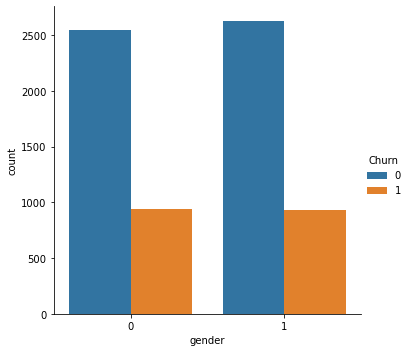

In [15]:
sns.catplot(x ='gender', hue ='Churn',
kind ='count', data = df)

Gender is not looking much effective as in both case ratio is nearly 75:25

In [16]:
churn_ratio_agewise = df.groupby(['SeniorCitizen','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_agewise)

SeniorCitizen  Churn
0              0        4508
               1        1393
1              0         666
               1         476
dtype: int64


In [17]:
print('Non-Senorcitizon will churn chances is', (1339*100)/(4508+1393))
print('Non-Senorcitizon will not churn chances is is', (4508*100)/(4508+1393))
print('Senorcitizon will churn chances is', (476*100)/(666+476))
print('Senorcitizon will not churn chances is is', (666*100)/(666+476))

Non-Senorcitizon will churn chances is 22.69106931028639
Non-Senorcitizon will not churn chances is is 76.3938315539739
Senorcitizon will churn chances is 41.68126094570928
Senorcitizon will not churn chances is is 58.31873905429072


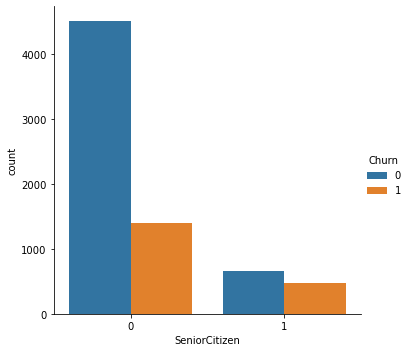

In [18]:
sns.catplot(x ='SeniorCitizen', hue ='Churn',
kind ='count', data = df)

Senior Citizen will churn chances are very high while non senior citizen churning chances are low

In [19]:
churn_ratio_dependent = df.groupby(['Dependents','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_dependent)

Dependents  Churn
0           0        3390
            1        1543
1           0        1784
            1         326
dtype: int64


In [20]:
print('Dependents will churn chances is', (326*100)/(1784+326))
print('Dependents will not churn chances is is', (1784*100)/(1784+326))
print('NonDependents will churn chances is', (1543*100)/(1543+3390))
print('NonDependents will not churn chances is', (3390*100)/(1543+3390))

Dependents will churn chances is 15.450236966824644
Dependents will not churn chances is is 84.54976303317535
NonDependents will churn chances is 31.27914048246503
NonDependents will not churn chances is 68.72085951753498


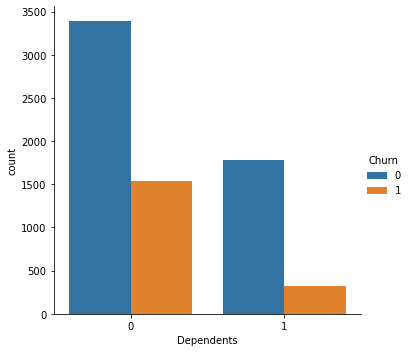

In [21]:
sns.catplot(x ='Dependents', hue ='Churn',
kind ='count', data = df)

Person who have dependents are not looking to churn easily as per visulise in graph while, person who didn't have dependents can churn easily

In [22]:
churn_ratio_partner = df.groupby(['Partner','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_partner)

Partner  Churn
0        0        2441
         1        1200
1        0        2733
         1         669
dtype: int64


In [23]:
print('Person who have partner will churn chances is', (669*100)/(2733+669))
print('Person who have partner will not churn chances is is', (2733*100)/(2733+669))
print('Person who did not have partner will churn chances is', (1200*100)/(2441+1200))
print('Person who did not have partner will not churn chances is', (2441*100)/(2441+1200))

Person who have partner will churn chances is 19.664902998236332
Person who have partner will not churn chances is is 80.33509700176367
Person who did not have partner will churn chances is 32.95797857731392
Person who did not have partner will not churn chances is 67.04202142268608


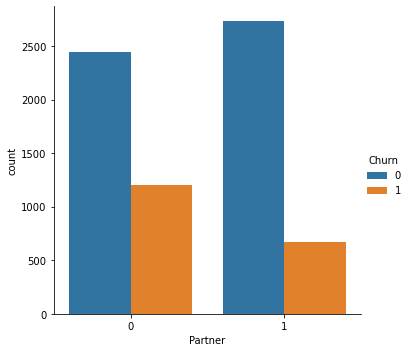

In [24]:
sns.catplot(x ='Partner', hue ='Churn',
kind ='count', data = df)

Unmarried person will churn ratio is high compare to married person

In [25]:
churn_ratio_phoneservice = df.groupby(['PhoneService','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_phoneservice)

PhoneService  Churn
0             0         512
              1         170
1             0        4662
              1        1699
dtype: int64


In [26]:
print('phoneservice available will churn chances is', (1699*100)/(1699+4662))
print('phoneservice available will not churn chances is is', (4662*100)/(1699+4662))
print('phoneservice unavailable will churn chances is', (170*100)/(170+512))
print('phoneservice unavailable will not churn chances is', (512*100)/(170+512))

phoneservice available will churn chances is 26.709636849551956
phoneservice available will not churn chances is is 73.29036315044804
phoneservice unavailable will churn chances is 24.926686217008797
phoneservice unavailable will not churn chances is 75.0733137829912


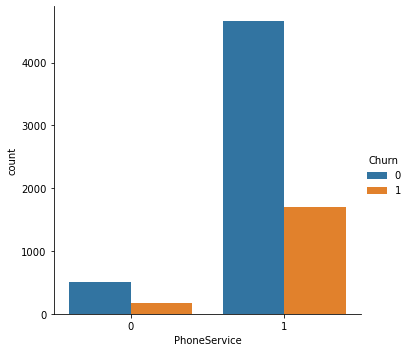

In [27]:
sns.catplot(x ='PhoneService', hue ='Churn',
kind ='count', data = df)

As per graph, phoneserive is not much effective as in both case ratio is 24:76

In [28]:
churn_ratio_MultipleLines = df.groupby(['MultipleLines','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_MultipleLines)

MultipleLines  Churn
0              0        2541
               1         849
1              0        2121
               1         850
2              0         512
               1         170
dtype: int64


In [29]:
print('MultipleLines available will churn chances is', (850*100)/(850+2121))
print('MultipleLines available will not churn chances is is', (2121*100)/(850+2121))
print('MultipleLines unavailable will churn chances is', (849*100)/(849+2541))
print('MultipleLines unavailable will not churn chances is', (2541*100)/(849+2541))
print('no phone unavailable will churn chances is', (170*100)/(170+512))
print('no phone unavailable will not churn chances is', (512*100)/(170+512))

MultipleLines available will churn chances is 28.6098956580276
MultipleLines available will not churn chances is is 71.3901043419724
MultipleLines unavailable will churn chances is 25.04424778761062
MultipleLines unavailable will not churn chances is 74.95575221238938
no phone unavailable will churn chances is 24.926686217008797
no phone unavailable will not churn chances is 75.0733137829912


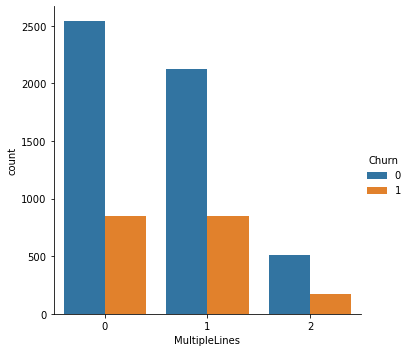

In [30]:
sns.catplot(x ='MultipleLines', hue ='Churn',
kind ='count', data = df)

It is also not looking much effective to target as in all 3 case it is near about 26 to 28

In [31]:
churn_ratio_InternetService = df.groupby(['InternetService','Churn']).apply(lambda df: round(df['Churn'].count(), 0))
print(churn_ratio_InternetService)

InternetService  Churn
DSL              0        1962
                 1         459
Fiber optic      0        1799
                 1        1297
No               0        1413
                 1         113
dtype: int64


In [1]:
print('DSL available will churn chances is', (459*100)/(459+1962))
print('DSL available will not churn chances is is', (1962*100)/(459+1962))
print('Fiber optic unavailable will churn chances is', (1297*100)/(1297+1799))
print('Fiber optic unavailable will not churn chances is', (1799*100)/(1297+1799))
print('no net available will churn chances is', (113*100)/(113+1413))
print('no net available will not churn chances is', (1413*100)/(113+1413))

DSL available will churn chances is 18.95910780669145
DSL available will not churn chances is is 81.04089219330855
Fiber optic unavailable will churn chances is 41.89276485788114
Fiber optic unavailable will not churn chances is 58.10723514211886
no net available will churn chances is 7.404980340760157
no net available will not churn chances is 92.59501965923984


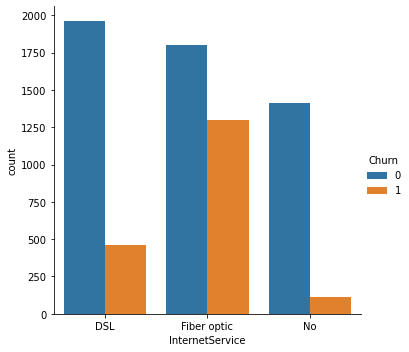

In [33]:
sns.catplot(x ='InternetService', hue ='Churn',
kind ='count', data = df)

If fibre optics are available then churning ratio willlow but if not then it will higher 

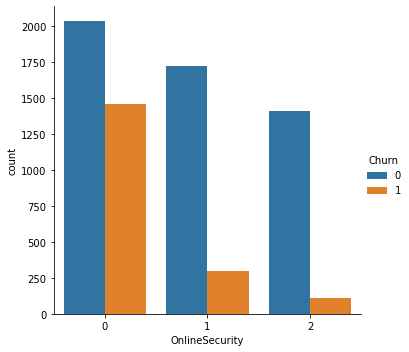

In [34]:
sns.catplot(x ='OnlineSecurity', hue ='Churn',
kind ='count', data = df)

Where online security not available there person are going to migrated in high ratio

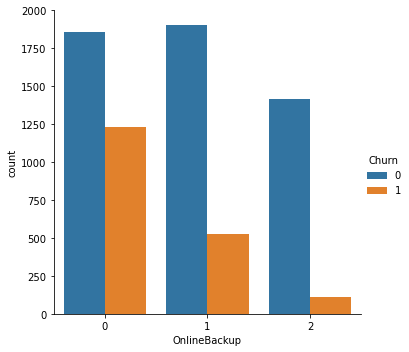

In [35]:
sns.catplot(x ='OnlineBackup', hue ='Churn',
kind ='count', data = df)

Where online backup not available then peoples are going to start churning

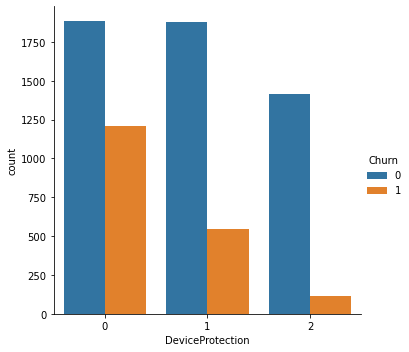

In [36]:
sns.catplot(x ='DeviceProtection', hue ='Churn',
kind ='count', data = df)

Device protection is also important factor as without it peoples are started churning

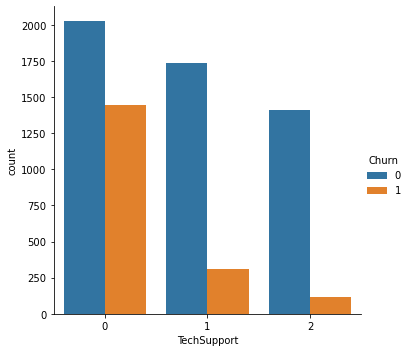

In [37]:
sns.catplot(x ='TechSupport', hue ='Churn',
kind ='count', data = df)

Peoples are looking for techsupport for easyness and if there is no techsupport, peoples are started churning

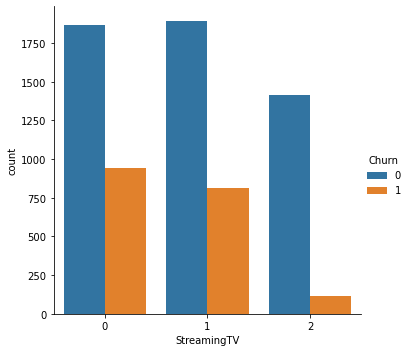

In [38]:
sns.catplot(x ='StreamingTV', hue ='Churn',
kind ='count', data = df)

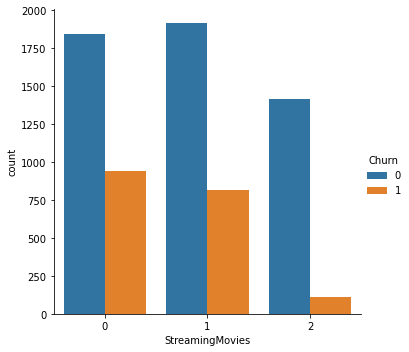

In [39]:
sns.catplot(x ='StreamingMovies', hue ='Churn',
kind ='count', data = df)

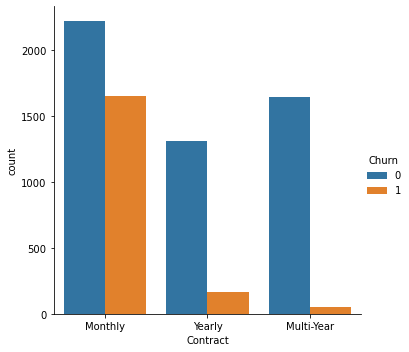

In [40]:
sns.catplot(x ='Contract', hue ='Churn',
kind ='count', data = df)

People who paid monthly are higher chances to churn while people who paid for 1 or 2 year are not much chances becasue they already paid up

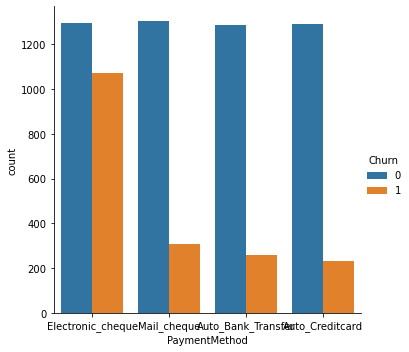

In [41]:
sns.catplot(x ='PaymentMethod', hue ='Churn',
kind ='count', data = df)

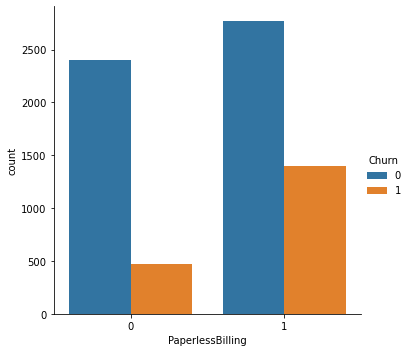

In [42]:
sns.catplot(x ='PaperlessBilling', hue ='Churn',
kind ='count', data = df)

Where paperless billing available, chances for churn is higher

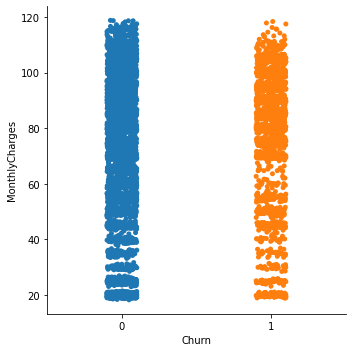

In [43]:
sns.catplot(x ='Churn', y = 'MonthlyCharges', data = df)

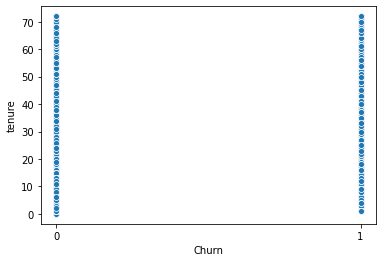

In [44]:
sns.scatterplot(x='Churn',y='tenure',data=df)

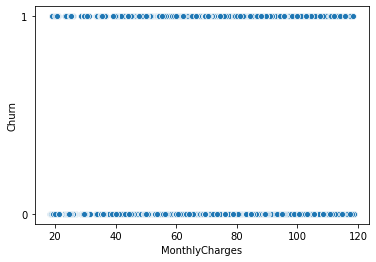

In [45]:
sns.scatterplot(x='MonthlyCharges',y='Churn',data=df)

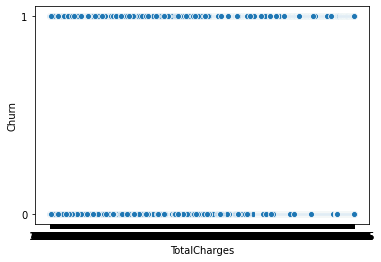

In [46]:
sns.scatterplot(x='TotalCharges',y='Churn',data=df)

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,DSL,0,1,0,0,0,0,Monthly,1,Electronic_cheque,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,Yearly,0,Mail_cheque,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Monthly,1,Mail_cheque,53.85,108.15,1
3,1,0,0,0,45,0,2,DSL,1,0,1,1,0,0,Yearly,0,Auto_Bank_Transfer,42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Monthly,1,Electronic_cheque,70.70,151.65,1


EDA REPORT:
    
SeniorCitizen chruning ratio is high

Dependents person churning ratio is low

Where FIbre optics available, clients are not much churning

ONline security, online backup, Device Protection, Techsupport are much required factor for customer satisfaction

Streaming TV and movies are good factor to customer retention

MOnthly paying client can churn easily

### ENCODING : TO convert Object to Int

In [48]:
from sklearn.preprocessing import LabelEncoder

lb= LabelEncoder()
df['InternetService'] = lb.fit_transform(df['InternetService'])
df['PaymentMethod'] = lb.fit_transform(df['PaymentMethod'])
df['Contract'] = lb.fit_transform(df['Contract'])
df['Churn'] = lb.fit_transform(df['Churn'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,2,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,2,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [49]:
df['gender']=df['gender'].astype(str).astype(int)
df['Partner']=df['Partner'].astype(str).astype(int)
df['Dependents']=df['Dependents'].astype(str).astype(int)
df['PhoneService']=df['PhoneService'].astype(str).astype(int)
df['MultipleLines']=df['MultipleLines'].astype(str).astype(int)
df['OnlineSecurity']=df['OnlineSecurity'].astype(str).astype(int)
df['OnlineBackup']=df['OnlineBackup'].astype(str).astype(int)
df['DeviceProtection']=df['DeviceProtection'].astype(str).astype(int)
df['StreamingTV']=df['StreamingTV'].astype(str).astype(int)
df['StreamingMovies']=df['StreamingMovies'].astype(str).astype(int)
df['Contract']=df['Contract'].astype(str).astype(int)
df['PaperlessBilling']=df['PaperlessBilling'].astype(str).astype(int)
df['TechSupport']=df['TechSupport'].astype(str).astype(int)

#Change Data Type

In [50]:
df = df.drop(['TotalCharges'],axis = 1)

In [51]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
Churn                 int32
dtype: object

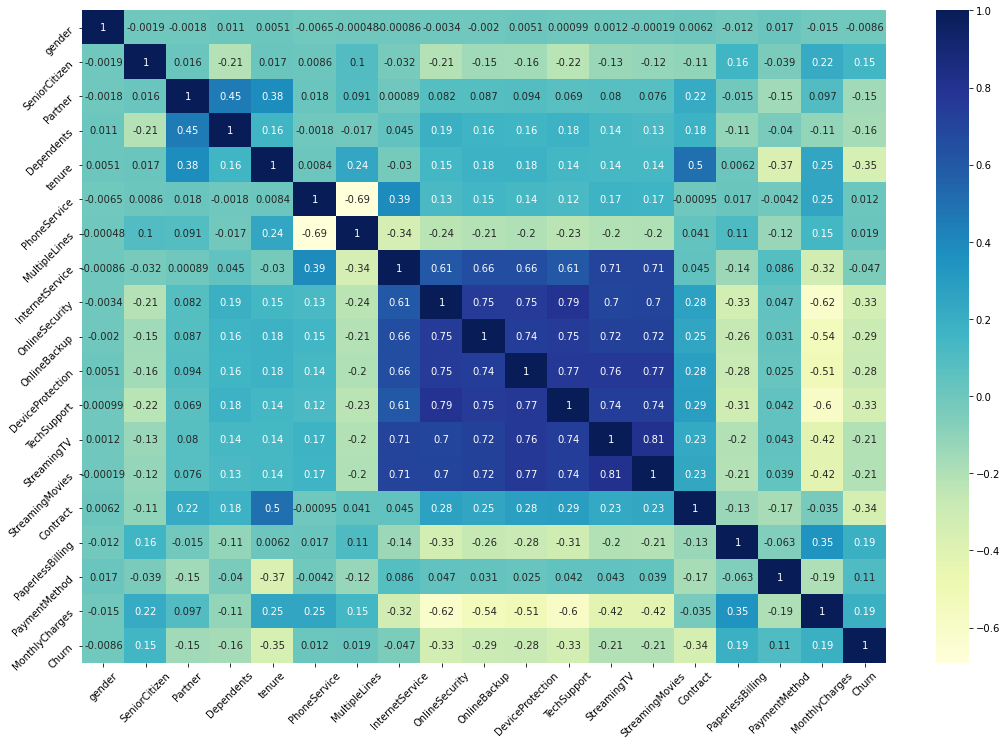

In [52]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### OUTLIERS DETECTION

In [53]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

#NO OUTLIERS

(7043, 19)
(7043, 19)


In [54]:
df_1.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.597817
InternetService     0.205423
OnlineSecurity      0.544240
OnlineBackup        0.407747
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.691581
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

In [55]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=0.9:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -1.0:
        df_1[col]=np.power(df_1[col],2)


In [56]:
df_1.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.597817
InternetService     0.205423
OnlineSecurity      0.544240
OnlineBackup        0.407747
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.691581
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

In [57]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0.0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,2,29.85,0.0
1,1,0.0,0,0,34,1,0,0,1,0,1,0,0,0,2,0,3,56.95,0.0
2,1,0.0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1.0
3,1,0.0,0,0,45,0,2,0,1,0,1,1,0,0,2,0,0,42.30,0.0
4,0,0.0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1.0


## MODEL BUILDING

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

x =df_1.drop('Churn',axis=1)
y =df_1['Churn']

In [59]:
lg=LogisticRegression()

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 1 score
test score 80.40885860306643
train score 80.42408178720181
Random state 37 score
test score 80.7495741056218
train score 80.65126845891709
Random state 43 score
test score 80.06814310051107
train score 80.10223400227187
Random state 107 score
test score 80.40885860306643
train score 80.40514956455887
Random state 225 score
test score 80.29528676888131
train score 80.32942067398713
Random state 267 score
test score 80.23850085178876
train score 80.19689511548656
Random state 274 score
test score 80.29528676888131
train score 80.32942067398713
Random state 402 score
test score 80.29528676888131
train score 80.25369178341538
Random state 413 score
test score 80.40885860306643
train score 80.367285119273
Random state 461 score
test score 80.23850085178876
train score 80.19689511548656
Random state 480 score
test score 80.29528676888131
train score 80.25369178341538
Random state 496 score
test score 80.18171493469619
train score 80.2158273381295


In [60]:
dtc=DecisionTreeClassifier()
svc=SVC()
l_svc = LinearSVC()
kn=KNeighborsClassifier(n_neighbors=5)
gb = GaussianNB()
sgd = SGDClassifier()
rf = RandomForestClassifier(n_estimators=100)


In [61]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

## Logistic Regression

In [62]:
fun(lg)

Accuracy Score 80.06814310051107
Confusion Matrix
 [[1151  142]
 [ 209  259]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1293
         1.0       0.65      0.55      0.60       468

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761

F1 score 59.608745684695066


## Support Vector Classifier

In [63]:
fun(svc)

Accuracy Score 79.32992617830777
Confusion Matrix
 [[1207   86]
 [ 278  190]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1293
         1.0       0.69      0.41      0.51       468

    accuracy                           0.79      1761
   macro avg       0.75      0.67      0.69      1761
weighted avg       0.78      0.79      0.77      1761

F1 score 51.07526881720431


### SVC (Hyper parameter Tuning)

In [64]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [65]:
grid_param = {
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'gamma' : ['scale','auto'],
    'max_iter' : (1,10000)
}

In [66]:
grid_search = GridSearchCV(estimator = svc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

In [67]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': (1, 10000)})

In [68]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 10000}


In [69]:
grid_search.best_score_

0.791367972535191

In [70]:
svc1 = SVC(gamma= 'scale', max_iter= 10000, kernel = 'poly')
svc1.fit(x_train,y_train)

SVC(kernel='poly', max_iter=10000)

In [71]:
svc1.score(x_test,y_test)

0.7961385576377058

## Decision Tree Classifier

In [72]:
fun(dtc)

Accuracy Score 73.0266893810335
Confusion Matrix
 [[1052  241]
 [ 234  234]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      1293
         1.0       0.49      0.50      0.50       468

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761

F1 score 49.62884411452811


### DTC with Hyperparameter Tuning

In [73]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range(1,10,2),
    'min_samples_split' : range(2,20,2),
    'splitter' : ['best','random']
}

In [74]:
grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

In [75]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [76]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 16, 'splitter': 'random'}


In [77]:
grid_search.best_score_

0.7919349000888736

In [78]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 5, min_samples_split= 2, splitter= 'random')
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       splitter='random')

In [79]:
dtc1.score(x_test,y_test)

0.7864849517319704

In [80]:
dtc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

## Gradient Boosting Classifier

In [81]:
fun(gb)

Accuracy Score 71.15275411697898
Confusion Matrix
 [[879 414]
 [ 94 374]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.68      0.78      1293
         1.0       0.47      0.80      0.60       468

    accuracy                           0.71      1761
   macro avg       0.69      0.74      0.69      1761
weighted avg       0.79      0.71      0.73      1761

F1 score 59.554140127388536


## KNN Classifier

In [82]:
fun(kn)

Accuracy Score 77.68313458262351
Confusion Matrix
 [[1124  169]
 [ 224  244]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1293
         1.0       0.59      0.52      0.55       468

    accuracy                           0.78      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.77      0.78      0.77      1761

F1 score 55.39160045402951


### KNN Classifier Hyper Parameter Tuning

In [99]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=5,p=1,weights='distance')
fun(knn1)

Accuracy Score 77.39920499716071
Confusion Matrix
 [[1108  185]
 [ 213  255]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1293
         1.0       0.58      0.54      0.56       468

    accuracy                           0.77      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761

F1 score 56.167400881057276


## GSD Classifier

In [83]:
fun(sgd)

Accuracy Score 79.95457126632594
Confusion Matrix
 [[1137  156]
 [ 197  271]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1293
         1.0       0.63      0.58      0.61       468

    accuracy                           0.80      1761
   macro avg       0.74      0.73      0.74      1761
weighted avg       0.79      0.80      0.80      1761

F1 score 60.558659217877086


## Random Forest Classifier

In [84]:
fun(rf)
pred=rf.predict(x_test)

Accuracy Score 78.64849517319705
Confusion Matrix
 [[1155  138]
 [ 238  230]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1293
         1.0       0.62      0.49      0.55       468

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.71      1761
weighted avg       0.77      0.79      0.78      1761

F1 score 55.02392344497606


### Random Forest Classifier with Hyper parameter Tuning

In [98]:
rndf1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=10)
fun(rndf1)

Accuracy Score 79.95457126632594
Confusion Matrix
 [[1198   95]
 [ 258  210]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1293
         1.0       0.69      0.45      0.54       468

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761

F1 score 54.33376455368693


## Boosting Techniques

In [85]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()

## Ada Boost Classifier

In [86]:
fun(ad)
pred=ad.predict(x_test)

Accuracy Score 79.61385576377057
Confusion Matrix
 [[1159  134]
 [ 225  243]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1293
         1.0       0.64      0.52      0.58       468

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761

F1 score 57.514792899408285


## Gradient Boost Classifier

In [87]:
fun(gd)
pred=gd.predict(x_test)

Accuracy Score 80.86314593980693
Confusion Matrix
 [[1181  112]
 [ 225  243]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1293
         1.0       0.68      0.52      0.59       468

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761

F1 score 59.05224787363306


In [100]:
score=cross_val_score(lg,x,y,cv=5)
print("score of cross validation score for lg", score.mean()*100)
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(svc1,x,y,cv=5)
print("score of cross validation score for svc1", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=4)
print("score of cross validation score for dtc",score.mean()*100)
score=cross_val_score(dtc1,x,y,cv=4)
print("score of cross validation score for dtc1",score.mean()*100)
score=cross_val_score(gb,x,y,cv=4)
print("score of cross validation score for gb",score.mean()*100)
score=cross_val_score(kn,x,y,cv=4)
print("score of cross validation score for kn",score.mean()*100)
score=cross_val_score(knn1,x,y,cv=4)
print("score of cross validation score for knn1",score.mean()*100)
score=cross_val_score(sgd,x,y,cv=4)
print("score of cross validation score for sgd",score.mean()*100)
score=cross_val_score(rf,x,y,cv=4)
print("score of cross validation score for rf",score.mean()*100)
score=cross_val_score(rndf1,x,y,cv=4)
print("score of cross validation score for rndf1",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for ad',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for gd",score.mean()*100)

score of cross validation score for lg 80.20737224982257
score of cross validation score for svc 78.87268936705594
score of cross validation score for svc1 79.28449012839538
score of cross validation score for dtc 72.92372457539621
score of cross validation score for dtc1 79.00044686644985
score of cross validation score for gb 71.75918576738422
score of cross validation score for kn 77.29665963295649
score of cross validation score for knn1 77.25410245986268
score of cross validation score for sgd 74.78328590418668
score of cross validation score for rf 78.51778270352588
score of cross validation score for rndf1 80.12218651592586
score of cross validation score for ad 80.15057947447214
score of cross validation score for gd 80.3208968948428


In [101]:
estimator=[]

estimator.append(('lg',LogisticRegression()))
estimator.append(('gd',DecisionTreeClassifier()))
estimator.append(('ad',KNeighborsClassifier()))

In [102]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[0. 0. 0. ... 0. 0. 0.]
hard voting score  0


In [114]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
y_pred_prob

array([0.4965587 , 0.50000867, 0.49215725, ..., 0.48408646, 0.497301  ,
       0.49065933])

In [115]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7163052531381998


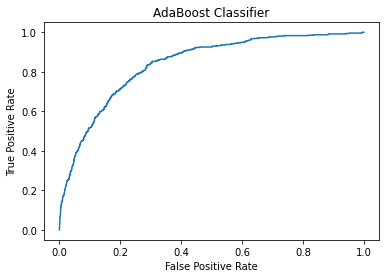

In [116]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier')
plt.show()

### AS Adaboost classifier have good accuracy and low difference with CV score so we will dump it

In [118]:
import pickle
filename='Customer_Churn.pkl'
pickle.dump(ad,open(filename,'wb'))

      Actual  Predict
4542     0.0      0.0
4014     0.0      1.0
3474     0.0      0.0
2295     1.0      1.0
4778     0.0      0.0
...      ...      ...
4210     0.0      0.0
4029     0.0      0.0
6254     0.0      0.0
3162     0.0      0.0
5814     0.0      0.0

[1761 rows x 2 columns]


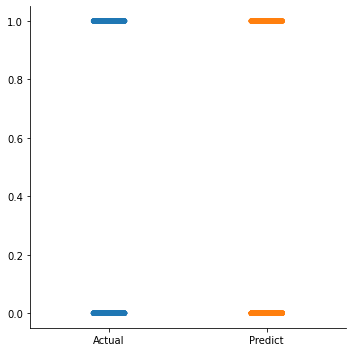

In [119]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=ad.predict(x_test)
print(res)
sns.catplot(data=res)